1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Добавление столбца для проведения анализа](#new)
4. [Анализ количества игр по годам](#an_year)  
5. [Динамика продаж по платформам](#an_place)
6. [Динамика по годам для топовых платформ](#top)
7. [Анализ продаж платформ за выбранный актуальный период](#an_actual)
8. [Корреляция Пирсона для отзывов пользователей и критиков](#an_cor)
9. [Общее распределение игр по жанрам](#genre_game)
10. [Портрет пользователя каждого региона](#person)
    * [Самые популярные платформы (топ-5)](#top_5)
    * [Самые популярные жанры (топ-5)](#top_5_g)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#region)
11. [Проверка гипотез](#reseach)
12. [Общий вывод](#done)

## Открытие данных <a id="start"></a> 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# загрузка данных
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

## Предобработка данных <a id="preprocessing"></a>

In [3]:
# функция для предобработки данных
def data_preprocessing(data):
    # приведение наименования столбцов датафрейма к правильному виду
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
    print('Вывод датафрейма на экран')  
    display(data)
    print(' ')   
    print(' ')
    print('Вывод основной информации о датафрейме с помощью метода info()') 
    display(data.info())
    print(' ') 
    print(' ')
    print('Вывод количества пропущенных значений для каждого столбца датафрейма')
    display(data.isna().sum())
    print(' ')   
    print(' ')
    print('Подсчёт количества явных дубликатов')
    display(data.duplicated().sum())

In [4]:
data_preprocessing(data)

Вывод датафрейма на экран


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


 
 
Вывод основной информации о датафрейме с помощью метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

 
 
Вывод количества пропущенных значений для каждого столбца датафрейма


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

 
 
Подсчёт количества явных дубликатов


0

**Вывод:**  
Необходимо изменить тип данных в столбцах:  
1. year_of_release — необходим тип данных для целого числа;   
2. user_score — необходим вещественный тип данных, поскольку critic_score и user_score должны быть приведены к одному типу данных для сравнения, а также user_score — это количественная величина. 

In [5]:
# изменение типа данных для года выпуска в целочисленный вид (в дату невозможно, в таком случае дата будет 01.01)
try:
    data['year_of_release'] = data['year_of_release'].astype('int64')
except:
    print('year_of_release - ошибка')  

year_of_release - ошибка


In [6]:
# преобразование типа данных для оценки пользователей
try:
    data['user_score'] = data['user_score'].astype('float64')
except:
    print('user_score - ошибка')    

user_score - ошибка


In [7]:
# проверка количества пропусков столбца year_of_release из-за ошибки приобразования типа данных
data['year_of_release'].isna().sum()

269

In [8]:
# проверка количества пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


**Вывод:**  
year_of_release — небольшое количество пропусков в данных, в процентном отношении 2% (269 значений). Заполнить данные пропуски невозможно ни средними, ни медианными значениями. Пропуски в данной колонке могли появиться из-за того, что игра будет выпущена в будущем или же год выпуска игры был давно и данные утеряны.

In [9]:
# количество пропущенных значений очень мало, удаление не повредит исследованию
data = data.dropna(subset=['year_of_release'])

In [10]:
# вывод уникальных значений столбца user_score из-за ошибки приобразования типа данных
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Вывод: аббревиатура 'tbd' ('To Be Determined') в столбце с оценкой пользователей говорит о том, что оценка пользователей будет определена позже. Заменить на 0 мы не можем, это было бы неверно, лучше заменить на значение NaN.

In [11]:
# замена значений 'tbd' в user_score на NaN
data = data.replace('tbd', 'NaN')

In [12]:
# изменение типа данных в столбцах, используя обработку ошибок при приобразовании

# изменение типа данных для года выпуска в целочисленный вид (в дату невозможно, в таком случае дата будет 01.01)
try:
    data['year_of_release'] = data['year_of_release'].astype('int64')
except:
    print('year_of_release - ошибка')  
    
# изменение типа данных в столбце оценки пользователей
try:
    data['user_score'] = data['user_score'].astype('float64')
except:
    print('user_score - ошибка')    

**Вывод**  
Тип данных заменили в столбцах user_score, year_of_release.  
Преобразование типа данных в столбе year_of_release в целочисленный тип было необходимо, поскольку дата в столце изначально была в вещественном типе. Ни дня, ни месяца в столбце не было, поэтому преобразовали год в целочисленный тип.  
Тип данных в столбце user_score был object, однако для проведения сравнительного анализа между user_score и critic_score столбцы должны быть одного типа. Столбец critic_score — вещественного типа. Также столбец user_score — это визуально не целое, соответственно необходимо было привести столбец к вещественному типу.

In [13]:
# проверка количества пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [14]:
# замена пропущенных значений rating
data['rating'] = data['rating'].fillna('неопределено')

In [15]:
# удаление строк с пропущенными значениями name, genre
# количество пропущенных значений очень мало, удаление не повредит исследованию
data = data.dropna(subset=['name','genre'])

In [16]:
# проверка полученных значений
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Вывод**  
Выявлены пропуски в данных:  
1. critic_score и user_score — большое количество пропусков в данных столбцах (51% и 55% соответственно), отбросить их нельзя поскольку потеряется большое количество данных, но и заменить значения на средние и медианные не получится, поскольку это оценки;  
2. rating — рейтинг от организации ESRB (подходящая возрастная категория) также имеет большое количество пропусков — 40% (6766 значений). Лучше заменить пропущенные значения на значение "неопределено" для проведения корректного анализа по заданию проекта (влияние рейтинга ESRB на продажи);  
3. name и genre — всего по 2 пропуска в каждом столбце, можно убрать данные пропуски, поскольку заполнить их значения невозможно;  
4. year_of_release — небольшое количество пропусков в данных, в процентном отношении 2% (269 значений). Заполнить данные пропуски невозможно ни средними, ни медианными значениями. Можно убрать данные пропуски, поскольку количество пропущенных значений очень мало, удаление не повредит исследованию.

Причины выявленных пропусков в данных:  
1. critic_score и user_score — пропуски в данных столбцах могли появится из-за того, что игра находится в стадии оценки, пользователи просто не оценили данные игры из-за их непопулярности, также причина может быть в том, что игра вышла недавно и оценки проходят модерацию, также некоторые игры могут быть очень старыми и во время их выпуска оценок ещё не ставили;  
2. rating — пропуски в столбце могли появится из-за того, что игра находится в процессе выставления возрастного рейтинга (например, ведется оспаривание выставленного ценза);  
3. name — пропуски в столбце могли появиться из-за технической ошибки (поскольку у игры не может быть наименования);
4. genre — жанр игры может быть не выставлен, поскольку у игры несколько жанров;  
5. year_of_release — пропуски в столбце могли появиться из-за того, что игра будет выпущена в будущем или же год выпуска игры был давно и данные утеряны.

## Добавление столбца для проведения анализа <a id="new"></a>

In [17]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,неопределено,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,неопределено,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,неопределено,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,неопределено,28.31


**Вывод**  
В ходе предобработки данных были подготовлены данные для дальнейшего анализа: исключены пропуски, преобразованы типы данных, определено какие значения пропущены в наибольшем количестве, названы причины по которым невозможно заменить пропуски, а также произведена замена пропусков, где было необходимо, добавлен столбец с подсчетом суммарных продаж во всех регионах.

## Шаг 3. Проведите исследовательский анализ данных

## Анализ количества игр по годам <a id="an_year"></a>

In [18]:
# сводная таблица количества игр, выпускавшихся в разные годы
data.pivot_table(index='year_of_release',values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


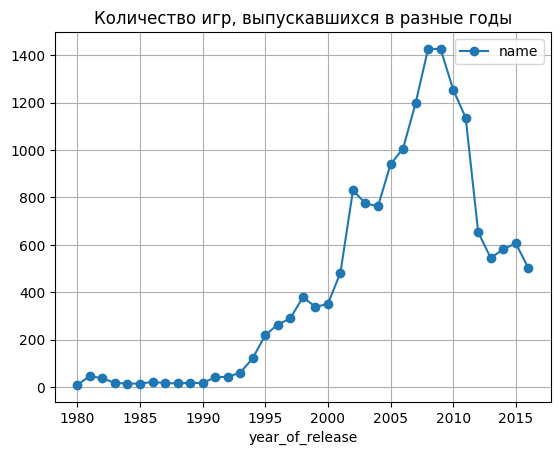

In [19]:
# зависимость количества игр выпускавшихся от года выпуска
data.pivot_table(index='year_of_release',values='name', aggfunc='count')\
    .plot(grid=True, style='o-', title = 'Количество игр, выпускавшихся в разные годы'); 
plt.show()

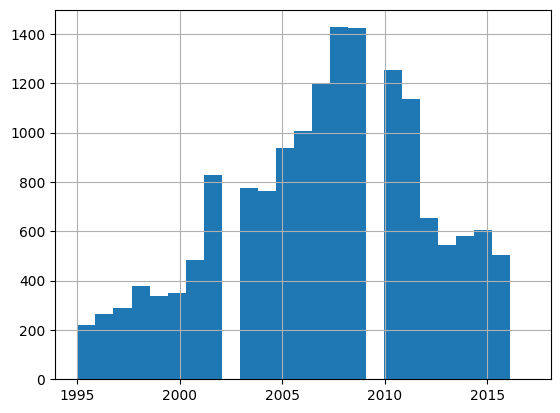

In [20]:
data['year_of_release'].hist(bins = 25, range=(1995, 2017))
plt.show()

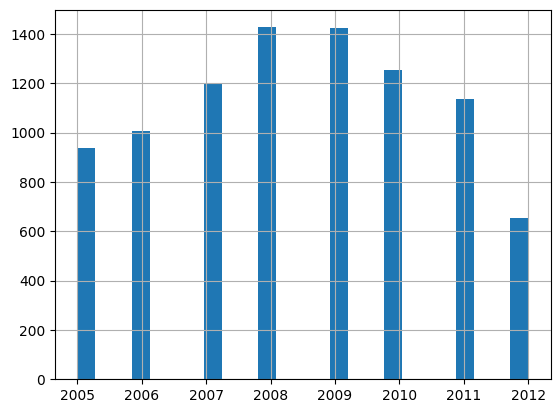

In [21]:
data['year_of_release'].hist(bins = 25, range=(2005, 2012))
plt.show()

**Вывод**  
На основании данных графиков можно сделать вывод, что данные о выпуске игр до 1995 года неважны, поскольку в период до 1995 года игры практически не выпускались. Наиболее интересный период выпуска игр приходится на интервал 2005-2012 года, поскольку наблюдается как пик выпуска, так и постепенный рост и падение количества игр.

## Динамика продаж по платформам <a id="an_place"></a>

In [22]:
# платформы с наибольшими суммарными продажами
top_platforms = data.pivot_table(index='platform',values='total_sales', aggfunc='sum')\
    .sort_values(by = 'total_sales', ascending = False)
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


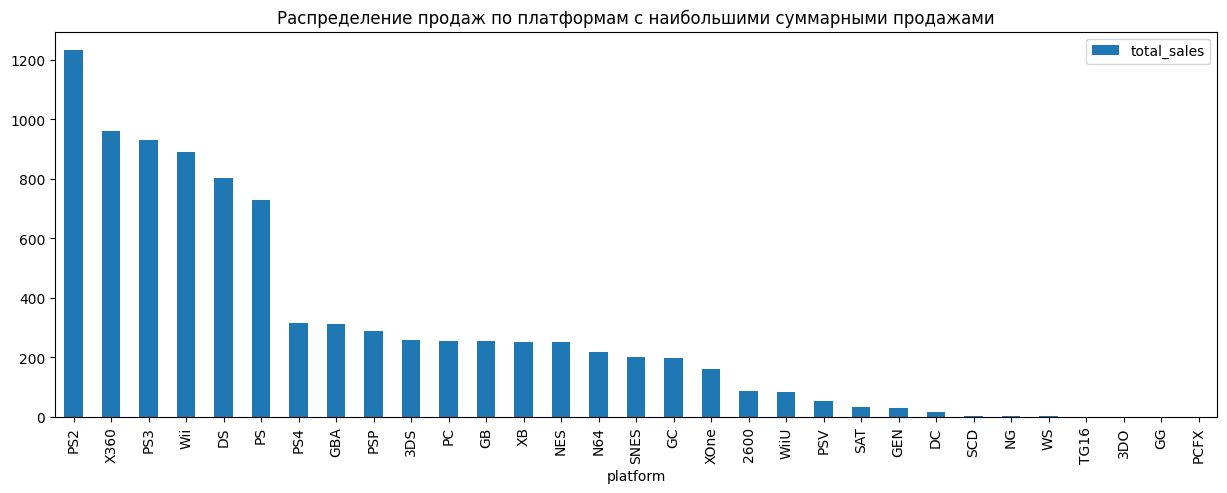

In [23]:
# гистограмма для платформ с наибольшими суммарными продажами
top_platforms.plot(kind='bar', figsize=(15, 5), title = 'Распределение продаж по платформам с наибольшими суммарными продажами')
plt.show()

**Вывод**  
На основании таблицы и графика можно сделать вывод, что наиболее популярными платформами являются PS2, X360, PS3, Wii, DS, PS. Платформы PS и PS4 имеют большой разрыв по показателям продаж, соответственно все платформы после PS лучше не брать в категорию "платформы с наибольшими суммарными продажами".

## Динамика по годам для топовых платформ <a id="top"></a> 

In [24]:
# 6 платформ с наибольшими суммарными продажами
top_platforms = top_platforms.reset_index()
top_6_platforms = top_platforms['platform'].head(6)
top_6_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

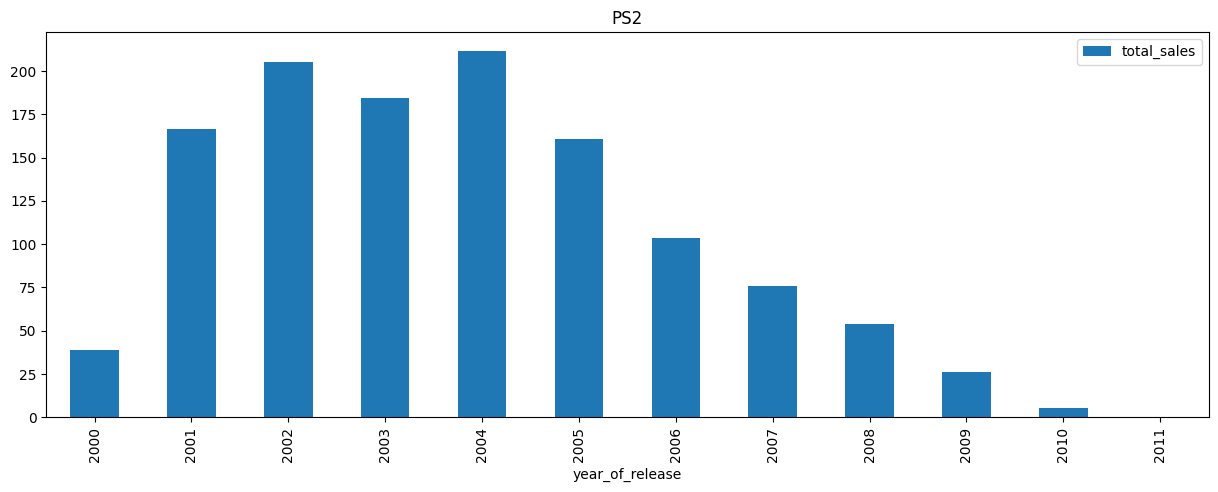

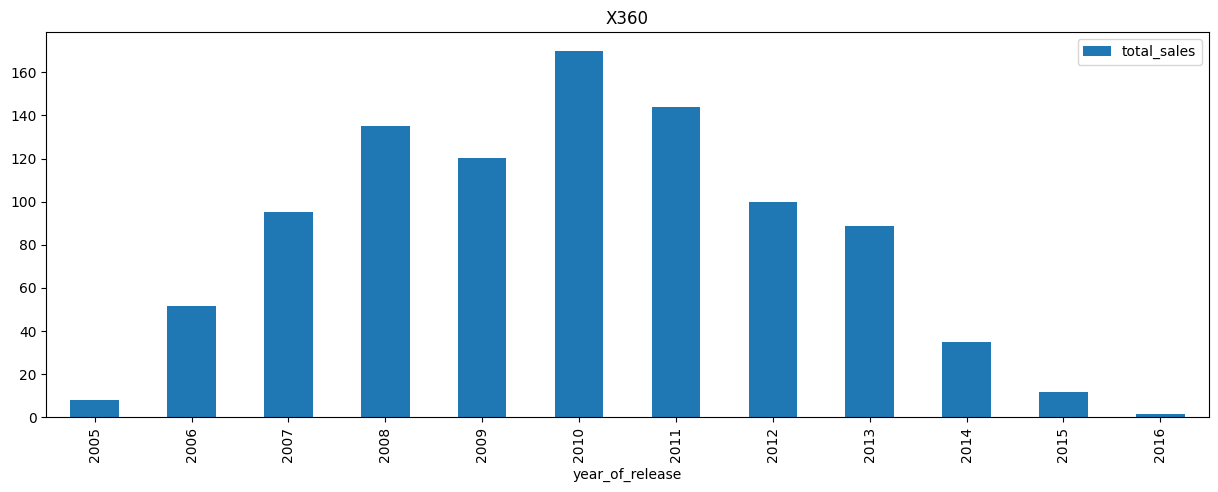

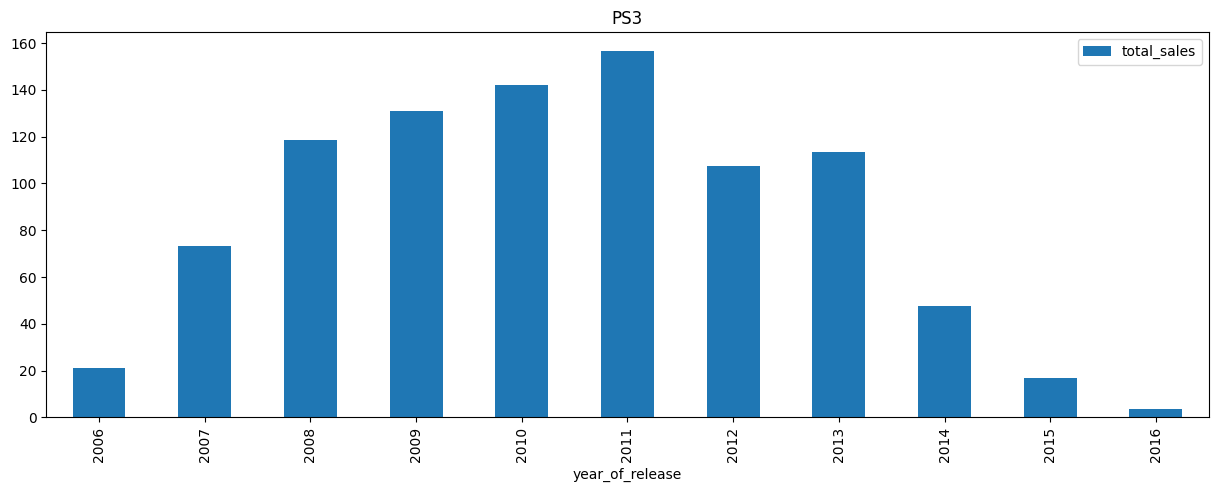

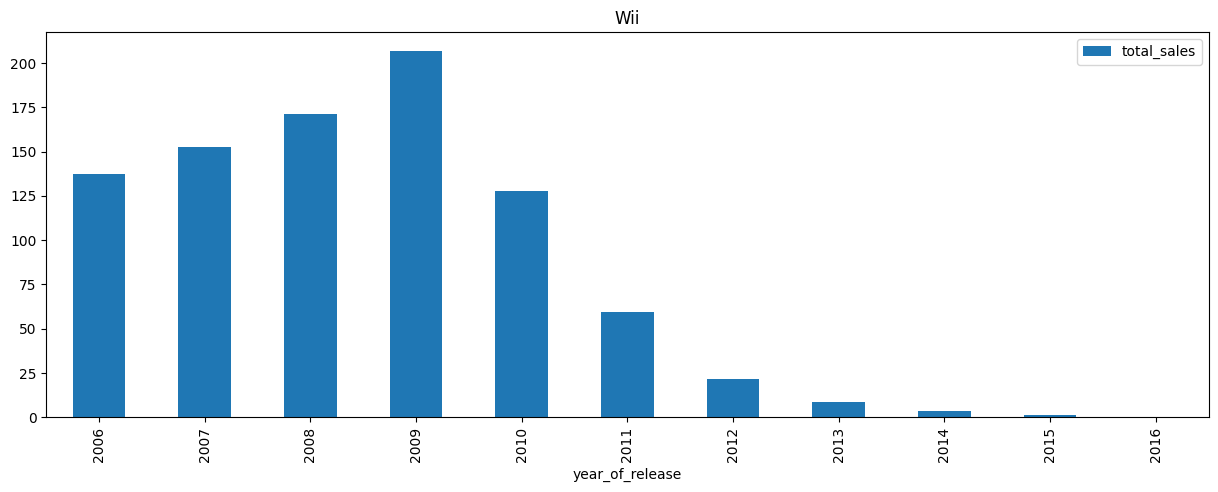

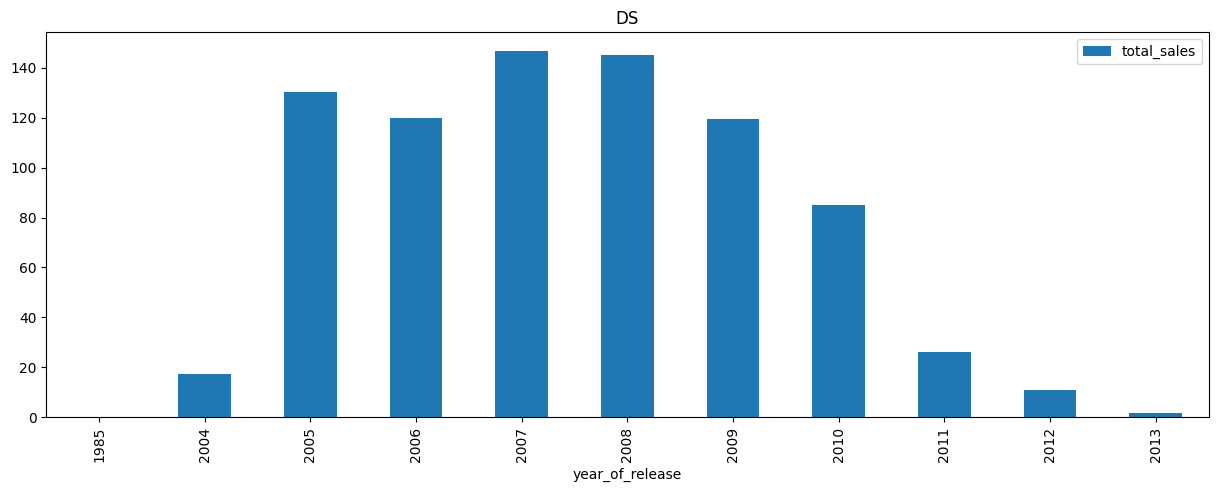

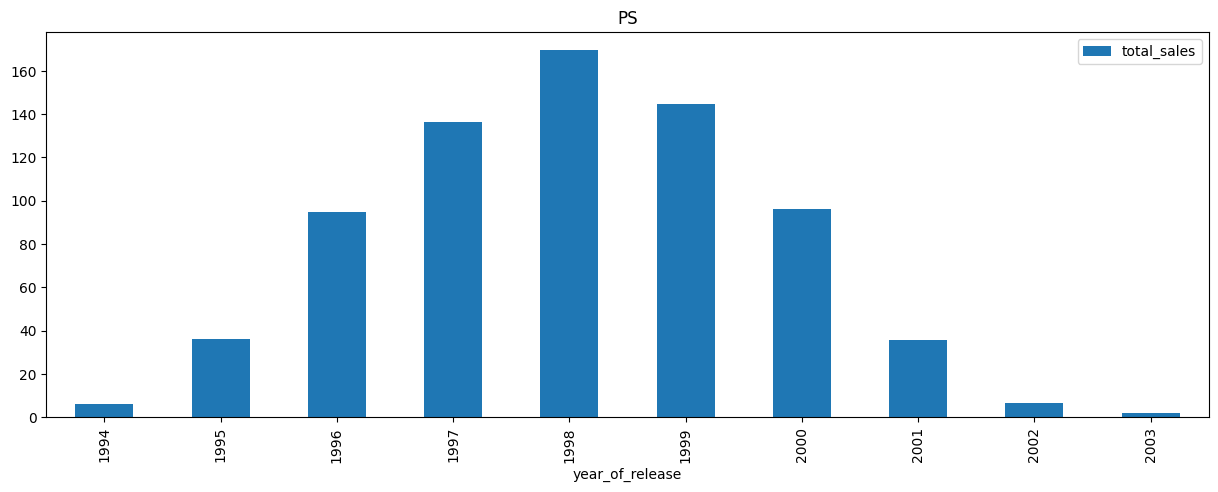

In [25]:
# распределение продаж по годам для топ 6 платформ
for el in top_6_platforms:
    data[data['platform'] == el].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
    .plot(kind = 'bar', figsize=(15,5))
    plt.title(el)

**Вывод**  
Можно сделать вывод, что большинство платформ появлялись в конце 1990 — начале 2000 г. С появлением новых платформ, продажи по старым платформам постепенно сходили на нет.

## Анализ продаж платформ за выбранный актуальный период <a id="an_actual"></a>

В качестве актуального периода возьмем период с 2012 — 2016 г., поскольку две последние по году выпуска платформы вышли в 2013 г. (PS4 и  XOne). Для того, чтобы провести корректный анализ старых платформ и новых, необходимо взять дату старта анализа — 2012 г.

In [26]:
data_query = data.query('year_of_release >= 2012')

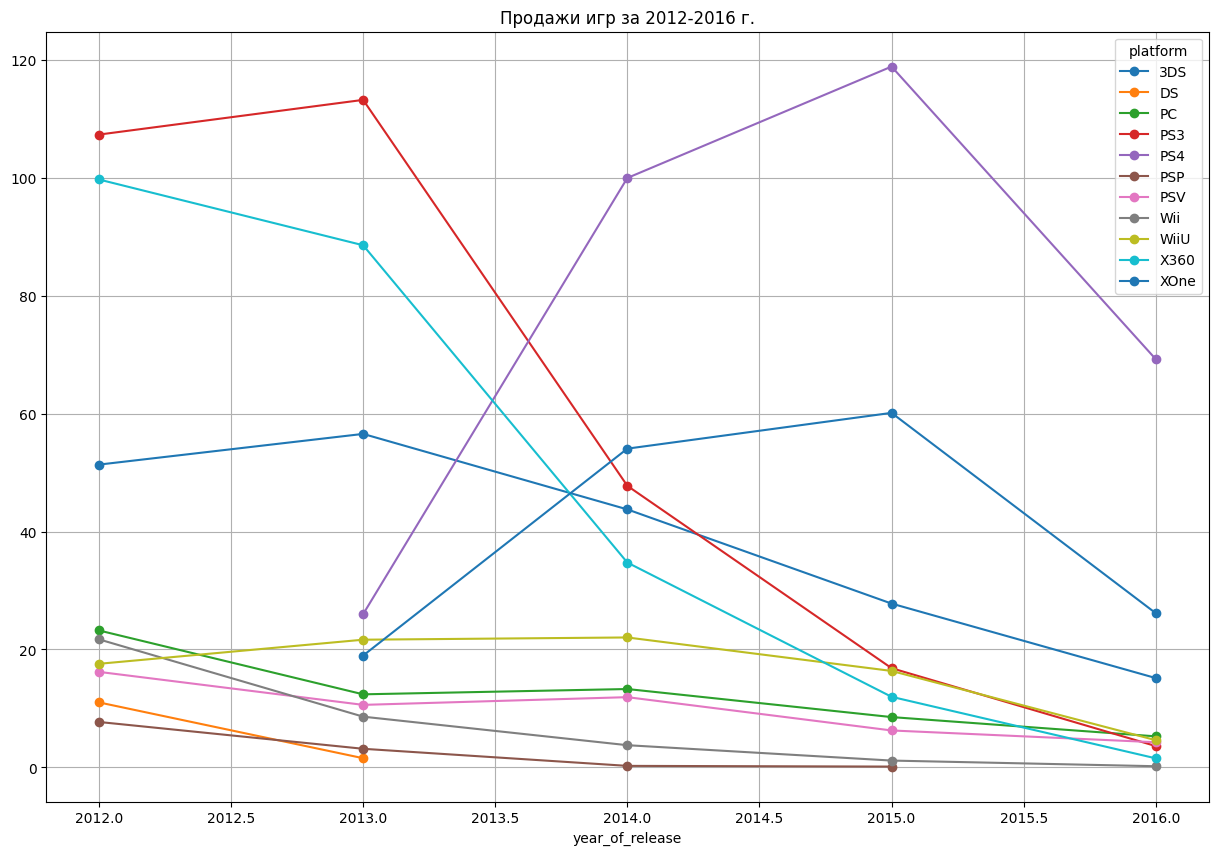

In [27]:
data_query.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
    .plot(grid=True, style='o-', figsize=(15, 10), title = 'Продажи игр за 2012-2016 г.')
plt.show()

**Вывод**  
Можно сделать вывод, что на всех платформах наблюдается тенденция к снижению продаж игр. Пик продаж в 2015 г. наблюдается на платформе PS4. Таким образом, наиболее перспективной по прибыли является платформа PS4. Платформа вышла относительно недавно, поскольку продажи начались с 2013 г., достигли пика в 2015 г., начали постепенно снижаться. Однако выход обновленной платформы Sony обычно занимает продалжительное время, соответственно в 2017 г., скорее всего, PS4 останется перспективной.  
Также следует обратить внимание на вторую по перспективе прибыльности платформу — XOne. Продажи начались также в 2013 г., но не достигли такого уровня, как у PS4. Однако, скорее всего, в будущем игры на данную платформу также будут хорошо продаваться.  
Платформы со вредним уровнем продаж, которые не так давно имели пиковые значения или же имеют некоторую стабильность в продажах, также можно отнести к потенциально прибыльным платформам: PS3, X360, 3DS, WiiU, PSV.  
Платформы с наиболее долгим падением продаж — DS, PSP, Wii не являются потенциально прбыльными, поскольку начиная с 2012 г. имеют тенденцию к планомерному снижению продаж.

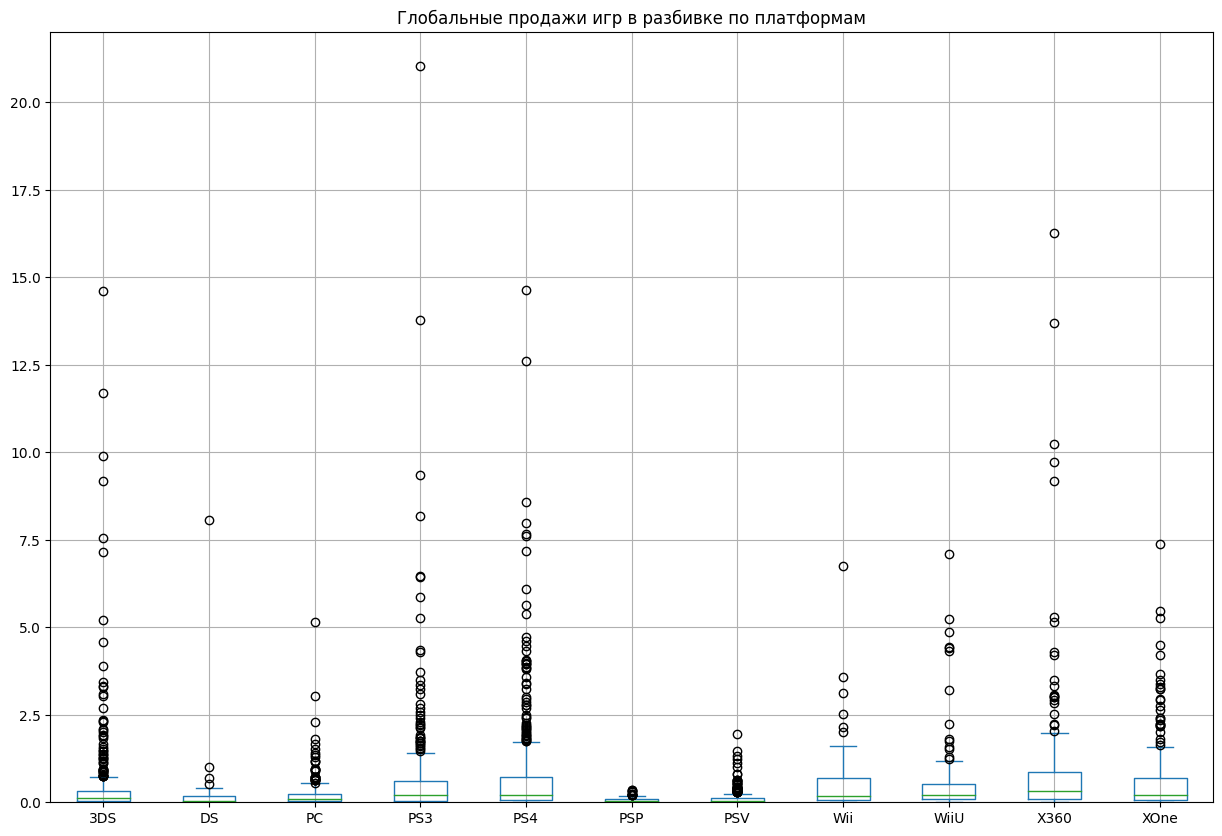

In [28]:
# «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_query.pivot_table(index='name', columns = 'platform', values='total_sales', aggfunc='sum')\
   .plot(kind='box', grid=True, figsize=(15, 10), ylim=(0,22), title = 'Глобальные продажи игр в разбивке по платформам')
plt.show()

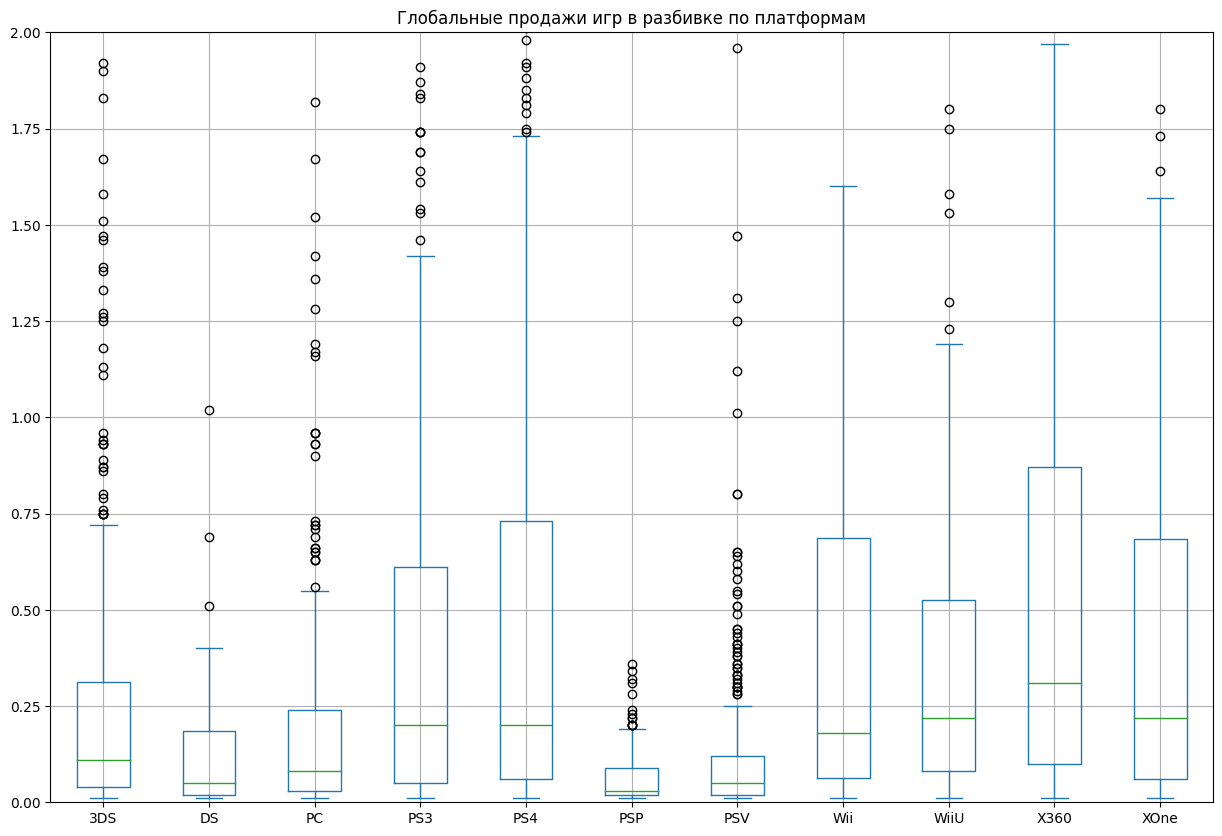

In [29]:
# «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_query.pivot_table(index='name', columns = 'platform', values='total_sales', aggfunc='sum')\
   .plot(kind='box', grid=True, figsize=(15, 10), ylim=(0,2), title = 'Глобальные продажи игр в разбивке по платформам')
plt.show()

**Вывод**  
На графиках видно, что наибольшие продажи заметны на платформах X360 и PS4, затем идут платформы XOne, Wii и PS3. У всех платформ видны выбросы, что может говорить о больших продажах каких-то особенных игр (например, эксклюзивов).

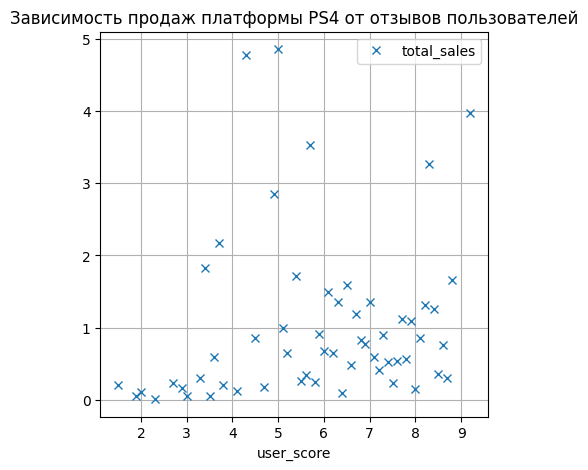

In [30]:
# Оценка влияния отзывов пользователей и критиков на продажи внутри платформы PS4
# диаграмма рассеяния для отзывов пользователей
data_query[data_query['platform']=='PS4'].pivot_table(index='user_score',values='total_sales')\
    .plot(grid=True, style='x', title = 'Зависимость продаж платформы PS4 от отзывов пользователей', figsize=(5, 5))
plt.show()

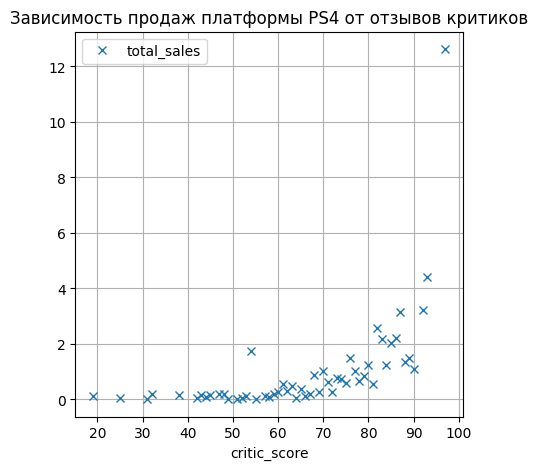

In [31]:
# диаграмма рассеяния для отзывов критиков
data_query[data_query['platform']=='PS4'].pivot_table(index='critic_score',values='total_sales')\
    .plot(grid=True, style='x', title = 'Зависимость продаж платформы PS4 от отзывов критиков', figsize=(5, 5))
plt.show()

In [32]:
# рассчет корреляции Пирсона для отзывов пользователей
data_query[data_query['platform']=='PS4']['total_sales'].corr(data['user_score'])

-0.03195711020455643

In [33]:
# рассчет корреляции Пирсона для отзывов критиков
data_query[data_query['platform']=='PS4']['total_sales'].corr(data['critic_score'])

0.4065679020617816

**Вывод**  
Можно сделать вывод, что отзывы пользователей не оказывают влияния на продажи игр, что нельзя сказать об отзывах критиков. Отзывы критиков оказывают прямое, но слабовыраженное влияние на продажи игр для PS4. Корреляция Пирсона для отзывов критиков говорит о том, что игры с наилучшими отзывами от критиков продаются лучше. Однако следует учитывать, что корреляция все же слабовыражена.

## Корреляция Пирсона для отзывов пользователей и критиков <a id="an_cor"></a>

In [34]:
# функция для рассчета корреляции Пирсона для отзывов пользователей и критиков
def analysis(platform_name):
    print(platform_name)
    print('Корреляция Пирсона для отзывов пользователей', \
          data_query[data_query['platform']==platform_name]['total_sales']\
          .corr(data_query['user_score']))
    print('Корреляция Пирсона для отзывов критиков', \
          data_query[data_query['platform']==platform_name]['total_sales']\
          .corr(data_query['critic_score']))

In [35]:
# рассчет для XOne
analysis('XOne')

XOne
Корреляция Пирсона для отзывов пользователей -0.06892505328279415
Корреляция Пирсона для отзывов критиков 0.41699832800840164


In [36]:
# рассчет для PS3
analysis('PS3')

PS3
Корреляция Пирсона для отзывов пользователей -0.005143522887113815
Корреляция Пирсона для отзывов критиков 0.33149725926295887


In [37]:
# рассчет для X360
analysis('X360')

X360
Корреляция Пирсона для отзывов пользователей 0.006163978646213357
Корреляция Пирсона для отзывов критиков 0.36057348885073387


In [38]:
# рассчет для 3DS
analysis('3DS')

3DS
Корреляция Пирсона для отзывов пользователей 0.19758263411038596
Корреляция Пирсона для отзывов критиков 0.32080286953607845


In [39]:
# рассчет для WiiU
analysis('WiiU')

WiiU
Корреляция Пирсона для отзывов пользователей 0.4002190202148617
Корреляция Пирсона для отзывов критиков 0.3483797601201749


In [40]:
# рассчет для PSV
analysis('PSV')

PSV
Корреляция Пирсона для отзывов пользователей -0.0043394375143148665
Корреляция Пирсона для отзывов критиков 0.09448789929316172


**Вывод**  
Можно сделать вывод, что отзывы пользователей либо не оказывают никакого влияния на продажи игр, либо оказывают слабовыраженное влияние (WiiU). Отзывы критиков также оказывают небольшое влияние на продажи игр у проанализированных приставок. В целом, можно сделать вывод, что и отзывы критиков и отзывы пользователей оказывают малое влияние на решение играков о покупке игры.

## Общее распределение игр по жанрам <a id="genre_game"></a>

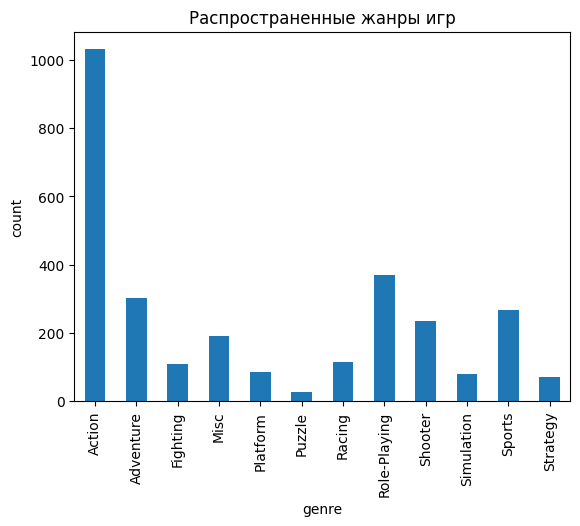

In [41]:
# наиболее распространенные жанры игр
data_query.groupby(by='genre')['genre'].count().plot(kind='bar', ylabel = 'count', title = 'Распространенные жанры игр')
plt.show()

Для анализа самых прибыльных жанров игр необходимо взять медианное значение, поскольку при использовании среднего значения, данные будут искажены. Несколько игр могли быть очень прибыльными, а вот остальные игры в группе, наоборот, провальными. Данный вывод подтверждается количеством выбросов продаж игр при распределении по платформам (могли иметь огромный успех игры на определенных платформах, соответственно определенных жанров). 

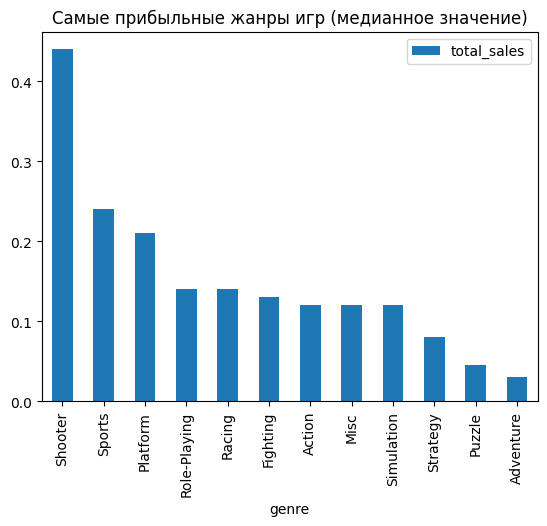

In [42]:
# самые прибыльные жанры игр (медианное значение)
data_query.groupby('genre').agg({'total_sales':'median'}).sort_values(by = 'total_sales', ascending = False)\
.plot(kind='bar', title = 'Самые прибыльные жанры игр (медианное значение)')
plt.show()

**Вывод**  
На основании полученнных данных можно сделать вывод, что наиболее прибыльными являются игры жанра "Platform" и "Shooter", "Sports" и "Fighting". Наименее прибыльными являются игры жаров "Puzzle", "Strategy", "Adventure". А наименее распространенными являются такие жанры, как "Puzzle", "Strategy", "Platform", "Fighting". Наиболее распространенным жанром игр является "бесспорный" лидер — "Action". 

## Портрет пользователя каждого региона <a id="person"></a>

### Самые популярные платформы (топ-5) <a id="top_5"></a>

In [43]:
# функция анализа самых популярных платформ (топ-5) каждого региона
def group_platform(region):
    platform_head = data_query.groupby('platform').agg({region: 'sum'}).sort_values(by = region, ascending = False).head()
    sum_platform_head = platform_head.sum()
    part_platform_head = str(round((platform_head / sum_platform_head) * 100, 2))
    platform_bar = platform_head.plot(grid=True, kind = 'bar', title = 'Топ-5 популярных платформ', figsize=(5,5))
    print(platform_head)
    print(part_platform_head)
    plt.show(platform_bar)

          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31
          na_sales
platform          
X360         27.98
PS4          21.72
PS3          20.65
XOne         18.60
3DS          11.05


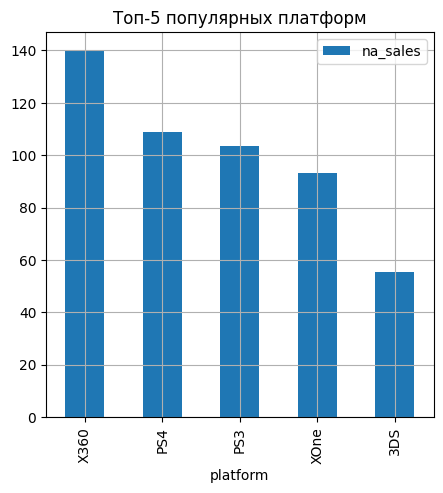

In [44]:
# самые популярные платформы в Северной Америке
group_platform('na_sales')

          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64
          eu_sales
platform          
PS4          33.86
PS3          25.64
X360         17.88
XOne         12.38
3DS          10.23


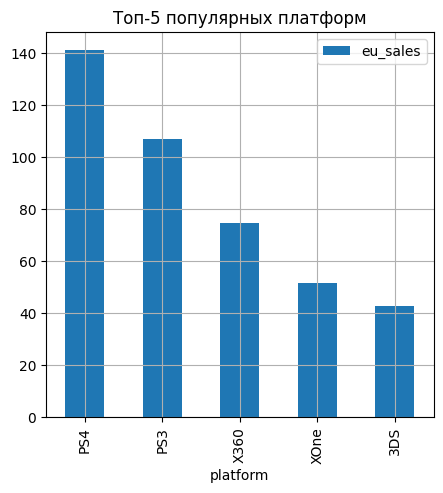

In [45]:
# самые популярные платформы в Европе
group_platform('eu_sales')

          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01
          jp_sales
platform          
3DS          50.72
PS3          20.39
PSV          12.16
PS4           9.22
WiiU          7.52


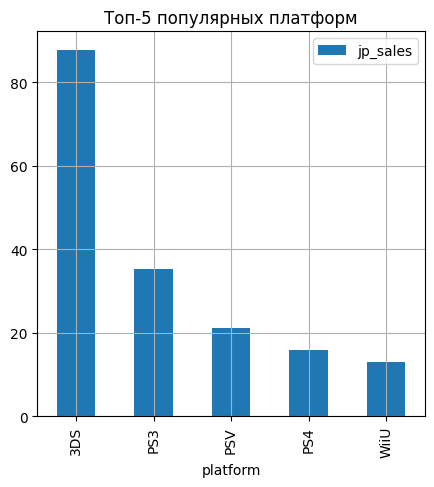

In [46]:
# самые популярные платформы в Японии
group_platform('jp_sales')

**Вывод**  
Наиболее популярными платформами для Северной Америки являются X360, PS4, PS3, XOne, 3DS. Однако лидирующую позицию занимает X360 (на неё приходитя 27.98%), а наименее популярной в топ-5 является 3DS (на неё приходится 11.05%).  
Наиболее популярными платформами для Европы являются PS4, PS3, X360, XOne, 3DS. Лидирующую позицию по продажам занимает PS4 (на неё приходитя 33.86%), а наименее популярной в топ-5 является 3DS (на неё приходится 10.23%).  
Наиболее популярными платформами для Японии являются 3DS, PS3, PSV, PS4, WiiU. Лидером продаж является 3DS (на неё приходитя 50.72%), а наименее популярной в топ-5 является WiiU (на неё приходится 7.52%).

### Самые популярные жанры (топ-5) <a id="top_5_g"></a>

In [47]:
# функция анализа самых популярных жанров (топ-5) каждого региона
def group_genre(region):
    genre_head = data_query.groupby('genre').agg({region: 'sum'}).sort_values(by = region, ascending = False).head()
    sum_genre_head = genre_head.sum()
    part_genre_head = str(round((genre_head / sum_genre_head) * 100, 2))
    genre_bar = genre_head.plot(grid=True, kind = 'bar', title = 'Топ-5 популярных жанров', figsize=(5,5))
    print(genre_head)
    print(part_genre_head)
    plt.show(genre_bar)

              na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
              na_sales
genre                 
Action           35.12
Shooter          28.59
Sports           16.10
Role-Playing     12.64
Misc              7.54


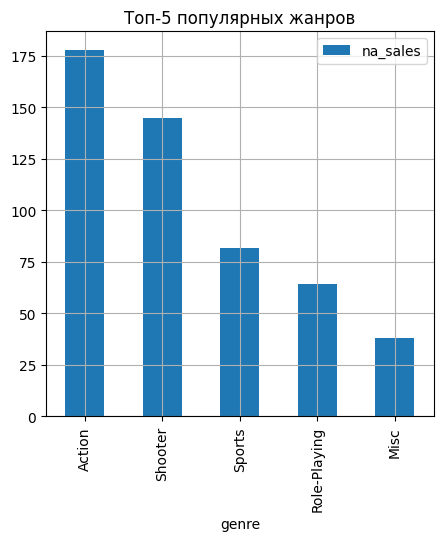

In [48]:
# самые популярные жанры в Северной Америке
group_genre('na_sales')

              eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
              eu_sales
genre                 
Action           38.15
Shooter          27.16
Sports           16.54
Role-Playing     11.62
Racing            6.53


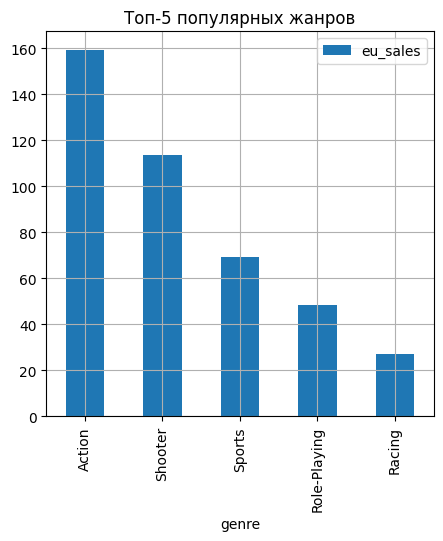

In [49]:
# самые популярные жанры в Европе
group_genre('eu_sales')

              jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44
              jp_sales
genre                 
Role-Playing     43.35
Action           34.98
Misc              8.52
Simulation        6.90
Fighting          6.25


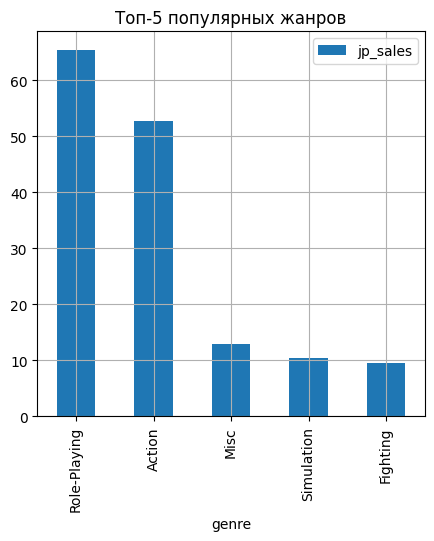

In [50]:
# самые популярные жанры в Японии
group_genre('jp_sales')

**Вывод**  
Наиболее популярными жанрами для Северной Америки и Европы, примерно в равном соотношении, являются Action, Shooter, Sports, Role-Playing. Однако пятым по популярности жанром для Северной Америки является Misc (7.54%), а вот для Европы — Racing (6.53%).   
Для Японии же наиболее популярным жанром, в отличии от  Северной Америки и Европы, является Role-Playing (43.35%), а затем же идут Action, Misc, Simulation и Fighting.  
Интересно, что для региона Северной Америки и Европы популярны примерно одни и те же жанры, а вот в Японии совершенно отличное распределение рейтинга жанров.

### Влияние рейтинга ESRB на продажи в отдельном регионе <a id="region"></a>

Пропущенные значения в rating в начале проекта заполнили на "неопределено"

In [51]:
# функция анализа влияния рейтинга ESRB на продажи в регионе
def top_sale(region):
    top_esrb = data_query.pivot_table(index='rating',values = region)\
    .plot(grid=True, kind='bar', title = 'Влияние рейтинга ESRB на продажи', figsize=(10, 5)) 
    return plt.show(top_esrb)

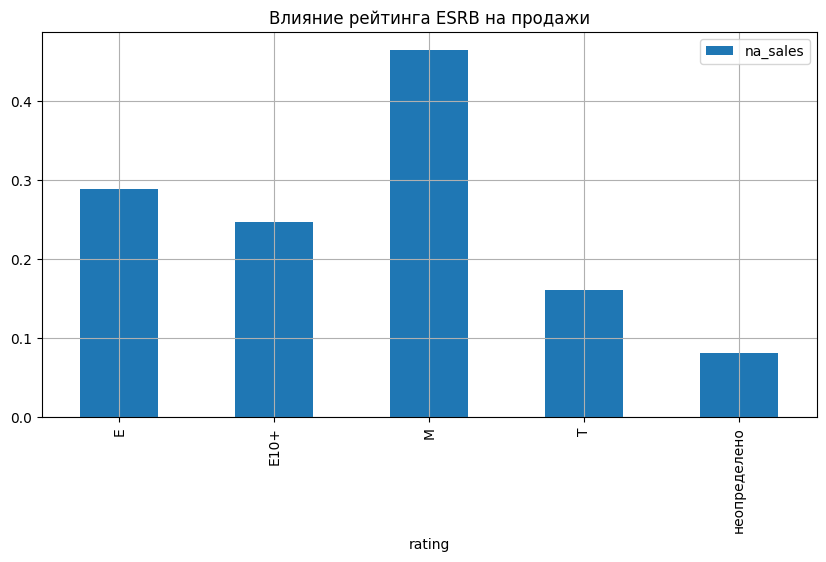

In [52]:
# влияние рейтинга ESRB на продажи в Северной Америке
top_sale('na_sales')

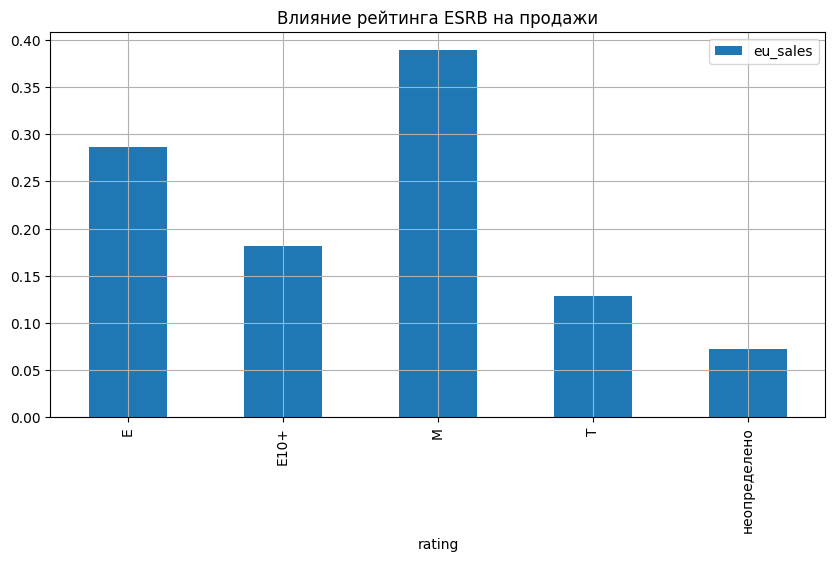

In [53]:
# влияние рейтинга ESRB на продажи в Европе
top_sale('eu_sales')

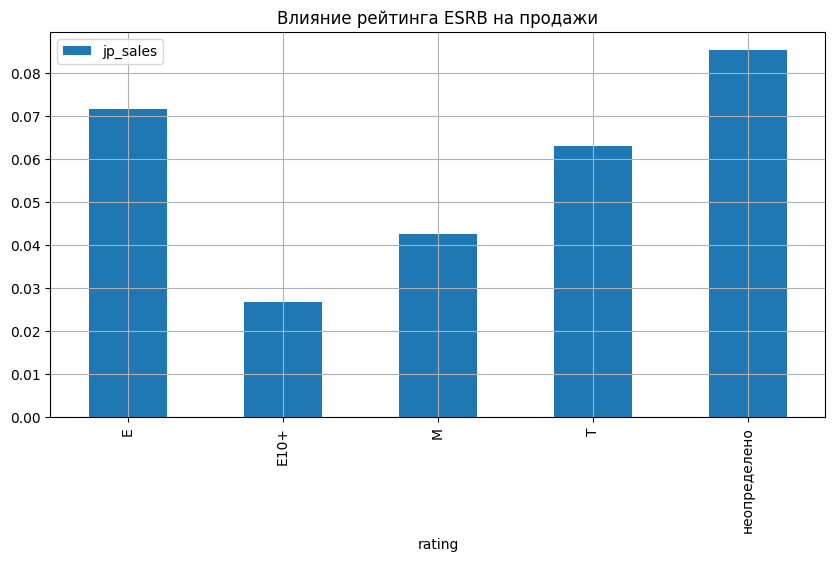

In [54]:
# влияние рейтинга ESRB на продажи в Японии
top_sale('jp_sales')

**Вывод**  
Можно сделать вывод, что рейтинг ESRB оказывает влияние на продажи в регионах. Игры с рейтингом M имеют наивысшие продажи в Европе и Северной Америке, а вот в Японии продажи средние. В Японии наоборот наиболее продаваемыми являются игры с рейтингом E. Игры с рейтингом E являются вторыми по популярности в Европе и Северной Америке. В Японии наименее продаваемыми являются игры с рейтингом E10+, в Европе и Северной Америке — игры с рейтингом T.В целом можно сделать вывод, что влияние рейтинга ESRB на продажи в Европе и Северной Америке схоже.

## Проверка гипотез <a id="reseach"></a>   

Проверка гипотез начинается с формулировки нулевой гипотезы H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Исходя из H0 формулируется альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.  
Альтернативная гипотеза принимается верной, если отбрасывается нулевая. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.  
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [55]:
# выборка по платформам Xbox One и PC
xbox_one_choice = data_query[(data_query['platform'] == 'XOne') &  (data_query['user_score'] > 0)]['user_score']
pc_choice = data_query[(data_query['platform'] == 'PC') &  (data_query['user_score'] > 0)]['user_score']

In [56]:
# проверка дисперсии выбороки Xbox One
np.var(data_query[data_query['platform'] == 'XOne']['user_score'])

1.8965188383045526

In [57]:
# проверка дисперсии выбороки PC
np.var(data_query[data_query['platform'] == 'PC']['user_score'])

2.7569952398906588

In [58]:
alpha = 0.05 # критический уровень статистической значимости

# метод st.ttest_ind, дисперсии разные, следовательно equal_var = False
results = st.ttest_ind(xbox_one_choice, pc_choice, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод**  
Не получилось отвергнуть нулевую гипотезу. Следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверка гипотез начинается с формулировки нулевой гипотезы H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Исходя из H0 формулируется альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные.  
Альтернативная гипотеза принимается верной, если отбрасывается нулевая. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.  
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.     
H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [59]:
# выборка по жанрам Action и Sports
action_choice = data_query[(data_query['genre'] == 'Action') &  (data_query['user_score'] > 0)]['user_score']
sports_choice = data_query[(data_query['genre'] == 'Sports') &  (data_query['user_score'] > 0)]['user_score']

In [60]:
# проверка дисперсии выбороки Action
np.var(data_query[data_query['genre'] == 'Action']['user_score'])

1.8854720340439224

In [61]:
# проверка дисперсии выбороки Sports
np.var(data_query[data_query['genre'] == 'Sports']['user_score'])

3.0073882971729127

In [62]:
alpha = 0.05 # критический уровень статистической значимости

# метод st.ttest_ind, дисперсии разные, следовательно equal_var = False
results = st.ttest_ind(sports_choice, action_choice, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод**  
Отвергаем нулевую гипотезу нулевую гипотезу. Следовательно, средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод <a id="done"></a>   

**Вывод**  
При проведении исследования были достигнуты поставленные цели:

* обработаны и подготовлены данные для проведения анализа.
* посчитаны и добавлены в таблицу дополнительные данные для дальнейшего изучения.
* определены платформы, которые лидируют по продажам, растут или падают.
* выявлено влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.  
* проанализированы самые прибыльные жанры игр.  
* составлен портрет пользователя каждого региона.  
* проверены гипотезы.  
  
Большинство платформ появлялись в конце 1990 начале 2000 г. С развитием технологий и выпуском новых платформ, продажи по старым платформам постепенно сходили на нет. Наиболее перспективной по прибыли является платформа PS4, следующей по перспективе прибыльности является XOne. Однако к прибыльным платформам также можно отнести платформы с относительно стабильными продажами, а также имеющие в недавнем прошлом пиковые показатели продаж: PS3, X360, 3DS, WiiU, PSV. Наименее перспективными платформами являются DS, PSP, Wii, поскольку имеют тенденцию к планомерному снижению продаж на протяжении продолжительного периода времени. 
  
На продажи игр оказывают прямое влияние отзывы критиков, чем выше рейтинг игры по отзывам критиков, тем больше продажи. Отзывы пользователей не оказывают влияния на продажи. Однако, следует учитывать, что отзывы критиков и пользователей не оказывают решающего влияния на принятие решения о покупке игры. На продажи игр в различных регионах также оказывает влияние рейтинг ESRB. Игры с рейтингом M имеют наивысшие продажи в Европе и Северной Америке, игры с рейтингом E наиболее продаваемые в Японии. 
    
Наиболее популярными платформами для Северной Америки являются X360, PS4, PS3, XOne, 3DS. Платформа X360 занимает лидирующее положение. Самым популярными жанрами являются Action, Shooter, Sports, Role-Playing, Misc.  
Наиболее популярными платформами для Европы являются PS4, PS3, X360, XOne, 3DS. Платформа PS4 занимает лидирующее положение. Самым популярными жанрами являются Action, Shooter, Sports, Role-Playing, Racing.  
Наиболее популярными платформами для Японии являются 3DS, PS3, PSV, PS4, WiiU. Платформа 3DS занимает лидирующее положение. Самым популярным жанром является Role-Playing, а затем идут Action, Misc, Simulation и Fighting.  
  
В ходе исследования были проверены две гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные. По итогам проверки, можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также средние пользовательские рейтинги жанров Action и Sports разные.